# Nasser Mohammed
## Research question/interests

My research interest is in and around what contributes to the most worker output, while prioritizing their life-work balance. Data on GDP produced per hour worked, seeing how productivity is linke to allotted vacation hours, and more are all areas I will be investigating. 

In [10]:
import numpy as np
import pandas as pd
from detect_delimiter import detect
import matplotlib.pylab as plt
import seaborn as sns

## Task 1: EDA

In [11]:
with open('../data/raw/pwt100.csv') as f:
    print(f)
    lines = f.readlines()
    print(f'Delimiter: "{detect(lines[1])}"')


#Example:
#Checking the file type, encoding on file, & delimiter
#file type: .csv
#encoding: 'cp1252'
#delimiter: ","


<_io.TextIOWrapper name='../data/raw/pwt100.csv' mode='r' encoding='cp1252'>
Delimiter: ","


In [12]:
# Now we can properly import our data
pwt = pd.read_csv("../data/raw/pwt100.csv",encoding='cp1251')

In [13]:
pwt.shape

(12810, 52)

In [14]:
pwt.head()

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,...,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
0,ABW,Aruba,Aruban Guilder,1950,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,Aruban Guilder,1951,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,Aruban Guilder,1952,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,Aruban Guilder,1953,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,Aruban Guilder,1954,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
pwt.columns

Index(['countrycode', 'country', 'currency_unit', 'year', 'rgdpe', 'rgdpo',
       'pop', 'emp', 'avh', 'hc', 'ccon', 'cda', 'cgdpe', 'cgdpo', 'cn', 'ck',
       'ctfp', 'cwtfp', 'rgdpna', 'rconna', 'rdana', 'rnna', 'rkna', 'rtfpna',
       'rwtfpna', 'labsh', 'irr', 'delta', 'xr', 'pl_con', 'pl_da', 'pl_gdpo',
       'i_cig', 'i_xm', 'i_xr', 'i_outlier', 'i_irr', 'cor_exp', 'statcap',
       'csh_c', 'csh_i', 'csh_g', 'csh_x', 'csh_m', 'csh_r', 'pl_c', 'pl_i',
       'pl_g', 'pl_x', 'pl_m', 'pl_n', 'pl_k'],
      dtype='object')

## Exploring Variable Definitions

**RGDPE** Expenditure-side real GDP (millions 2005 USD)
- Uses prices for final goods that are constant across countries and over time

**RGDPO** Output-side real GDP (millions 2005 USD)
- Uses prices for final goods exports and imports that are constant across countries an over time

**POP** (millions)

**EMP** Employed per million
- Number of person(s) enganged in work per million

**AVH** Average Annual Hours worked by person Enganged

**HC** Human Capital Index

**CWTFP** Welfare-relevant TFP Levels at current PPPs (USA = 1 reference)

**CK** Capital stock (millions 2005 USD)

**XR** Exchange Rates (currency/USD)


In [16]:
pwt.nunique(axis=0) #183 countries, good to know!

countrycode        183
country            183
currency_unit      136
year                70
rgdpe            10399
rgdpo            10398
pop              10388
emp               9504
avh               3391
hc                8615
ccon             10399
cda              10399
cgdpe            10399
cgdpo            10394
cn               10314
ck                7027
ctfp              6347
cwtfp             6347
rgdpna           10387
rconna           10397
rdana            10397
rnna             10313
rkna              6958
rtfpna            6295
rwtfpna           6293
labsh             3155
irr               7251
delta            10311
xr                6083
pl_con           10398
pl_da            10396
pl_gdpo          10398
i_cig                5
i_xm                 3
i_xr                 2
i_outlier            2
i_irr                4
cor_exp           1641
statcap            220
csh_c            10390
csh_i            10397
csh_g            10395
csh_x            10397
csh_m      

In [17]:
pwt.describe()

,year,rgdpe,rgdpo,pop,emp,avh,hc,ccon,cda,cgdpe,...,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
count,12810.000000,1.039900e+04,1.039900e+04,10399.000000,9529.000000,3492.000000,8637.000000,1.039900e+04,1.039900e+04,1.039900e+04,...,10399.000000,10399.000000,10399.000000,10399.000000,10399.000000,10399.000000,10399.000000,10399.000000,10314.000000,7095.000000
mean,1984.500000,3.048523e+05,3.070802e+05,30.962982,14.171167,1986.923200,2.087200,2.249465e+05,3.049463e+05,3.061396e+05,...,0.229317,-0.300829,0.017791,0.370850,0.423964,0.345635,0.409820,0.403422,0.359145,1.334312
std,20.205986,1.214332e+06,1.218457e+06,116.189454,58.056973,284.003338,0.727413,8.882343e+05,1.236095e+06,1.226056e+06,...,0.266793,0.640212,0.216200,0.424091,0.635708,0.408015,0.196283,0.202566,0.435645,1.941830
min,1950.000000,2.036377e+01,2.765232e+01,0.004425,0.001200,1380.607643,1.007038,1.604856e+01,2.176663e+01,2.026185e+01,...,-1.937363,-23.237627,-12.568965,0.015589,0.006002,0.009270,0.007354,0.020806,0.012977,0.064379
25%,1967.000000,6.801782e+03,7.191773e+03,1.579663,0.775101,1788.478804,1.450483,5.892980e+03,7.194495e+03,6.689781e+03,...,0.067027,-0.379584,-0.025204,0.171226,0.191958,0.116110,0.237652,0.240777,0.164562,0.650612
50%,1984.500000,3.031913e+04,3.084435e+04,6.150688,2.856044,1972.355973,1.987572,2.465417e+04,3.134864e+04,3.031841e+04,...,0.140116,-0.200254,0.000326,0.306258,0.377943,0.244554,0.443856,0.452949,0.295903,0.955435
75%,2002.000000,1.559740e+05,1.587386e+05,19.934229,8.266107,2168.035042,2.674011,1.133967e+05,1.532297e+05,1.559242e+05,...,0.300332,-0.102694,0.044529,0.484549,0.557087,0.452951,0.557034,0.541063,0.447797,1.415420
max,2019.000000,2.086051e+07,2.059584e+07,1433.783686,799.306641,3039.794005,4.351568,1.682624e+07,2.138355e+07,2.079136e+07,...,3.523480,32.874020,7.598285,23.122841,34.444988,18.420809,2.056070,4.990355,20.649197,31.932846


In [18]:
pwt.xr.unique()

array([           nan, 1.79000000e+00, 2.86251000e-08, ...,
       1.28894179e+01, 9.99719998e-01, 9.99859999e-01])

In [19]:
pwt_s = pwt[['countrycode', 'country', 'currency_unit', 'year', 'rgdpe', 'rgdpo',
       'pop', 'emp', 'avh', 'hc',  'cn', 'ctfp']].copy()

#These are the initial variables I'm interested in 

In [20]:
pwt_s.head()

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,cn,ctfp
0,ABW,Aruba,Aruban Guilder,1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,Aruban Guilder,1951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,Aruban Guilder,1952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,Aruban Guilder,1953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,Aruban Guilder,1954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
pwt_s.shape

(12810, 12)

In [22]:
"""
Lots of NaN values, so I used population as a good guideline for a
"If they dont know the population of the country this year they probably don't know the
total factor productivity level of the country" test.
"""
pwt_s = pwt_s.dropna(subset=['pop']) 


In [23]:
# I'm going to look at years between 1970 and 2019, for a consistent 1 year gap between rows
pwt_s = pwt_s[pwt_s['year'] >= 1980]

<AxesSubplot:title={'center':'Correlation Matrix'}>

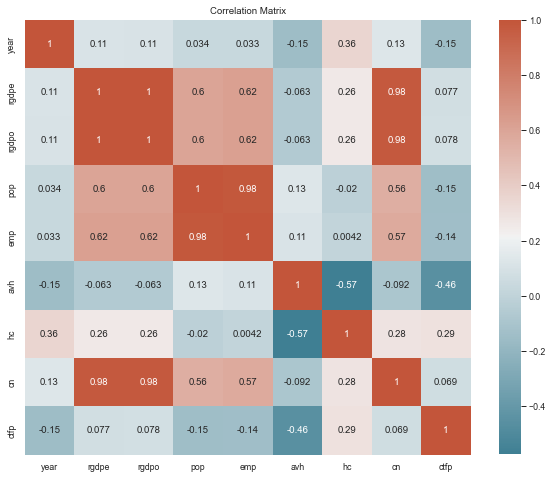

In [24]:
# calculate correlation matrix
fig, ax = plt.subplots(figsize=(10,8)) 
ax.set_title('Correlation Matrix')
corr = pwt_s.corr() 
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

From first look, there is strong correlation between number employed and the population (common sense but good to confirm)
Correlation between year and human capital index is good to see, upward trend in the education and health of workers
Negative correlation between average hours worked and human capital index, lets take a closer look with a scatter plot.

<AxesSubplot:xlabel='avh', ylabel='hc'>

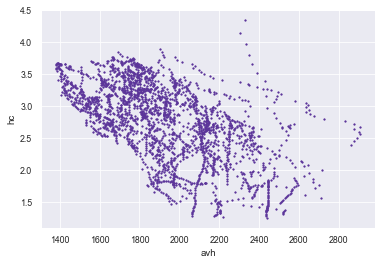

In [25]:
pwt_s.plot(kind='scatter', x='avh', y='hc', s=2)

We see a negative correlation but its a pretty messy plot. Lets look at this country by country

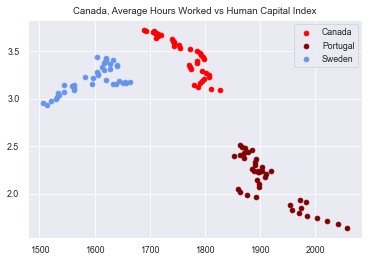

In [26]:
pwt_can = pwt_s[pwt_s['countrycode'] == 'CAN']
pwt_prt = pwt_s[pwt_s['countrycode'] == 'PRT']
pwt_swe = pwt_s[pwt_s['countrycode'] == 'SWE']
fig, ax = plt.subplots()
ax.set_title('Canada, Average Hours Worked vs Human Capital Index')
ax.scatter(pwt_can['avh'], pwt_can['hc'], c='red', label='Canada')
ax.scatter(pwt_prt['avh'], pwt_prt['hc'], c='maroon', label='Portugal')
ax.scatter(pwt_swe['avh'], pwt_swe['hc'], c='cornflowerblue', label='Sweden')
ax.legend()

Tends to be a negative trend, but there are exceptions it looks like! 

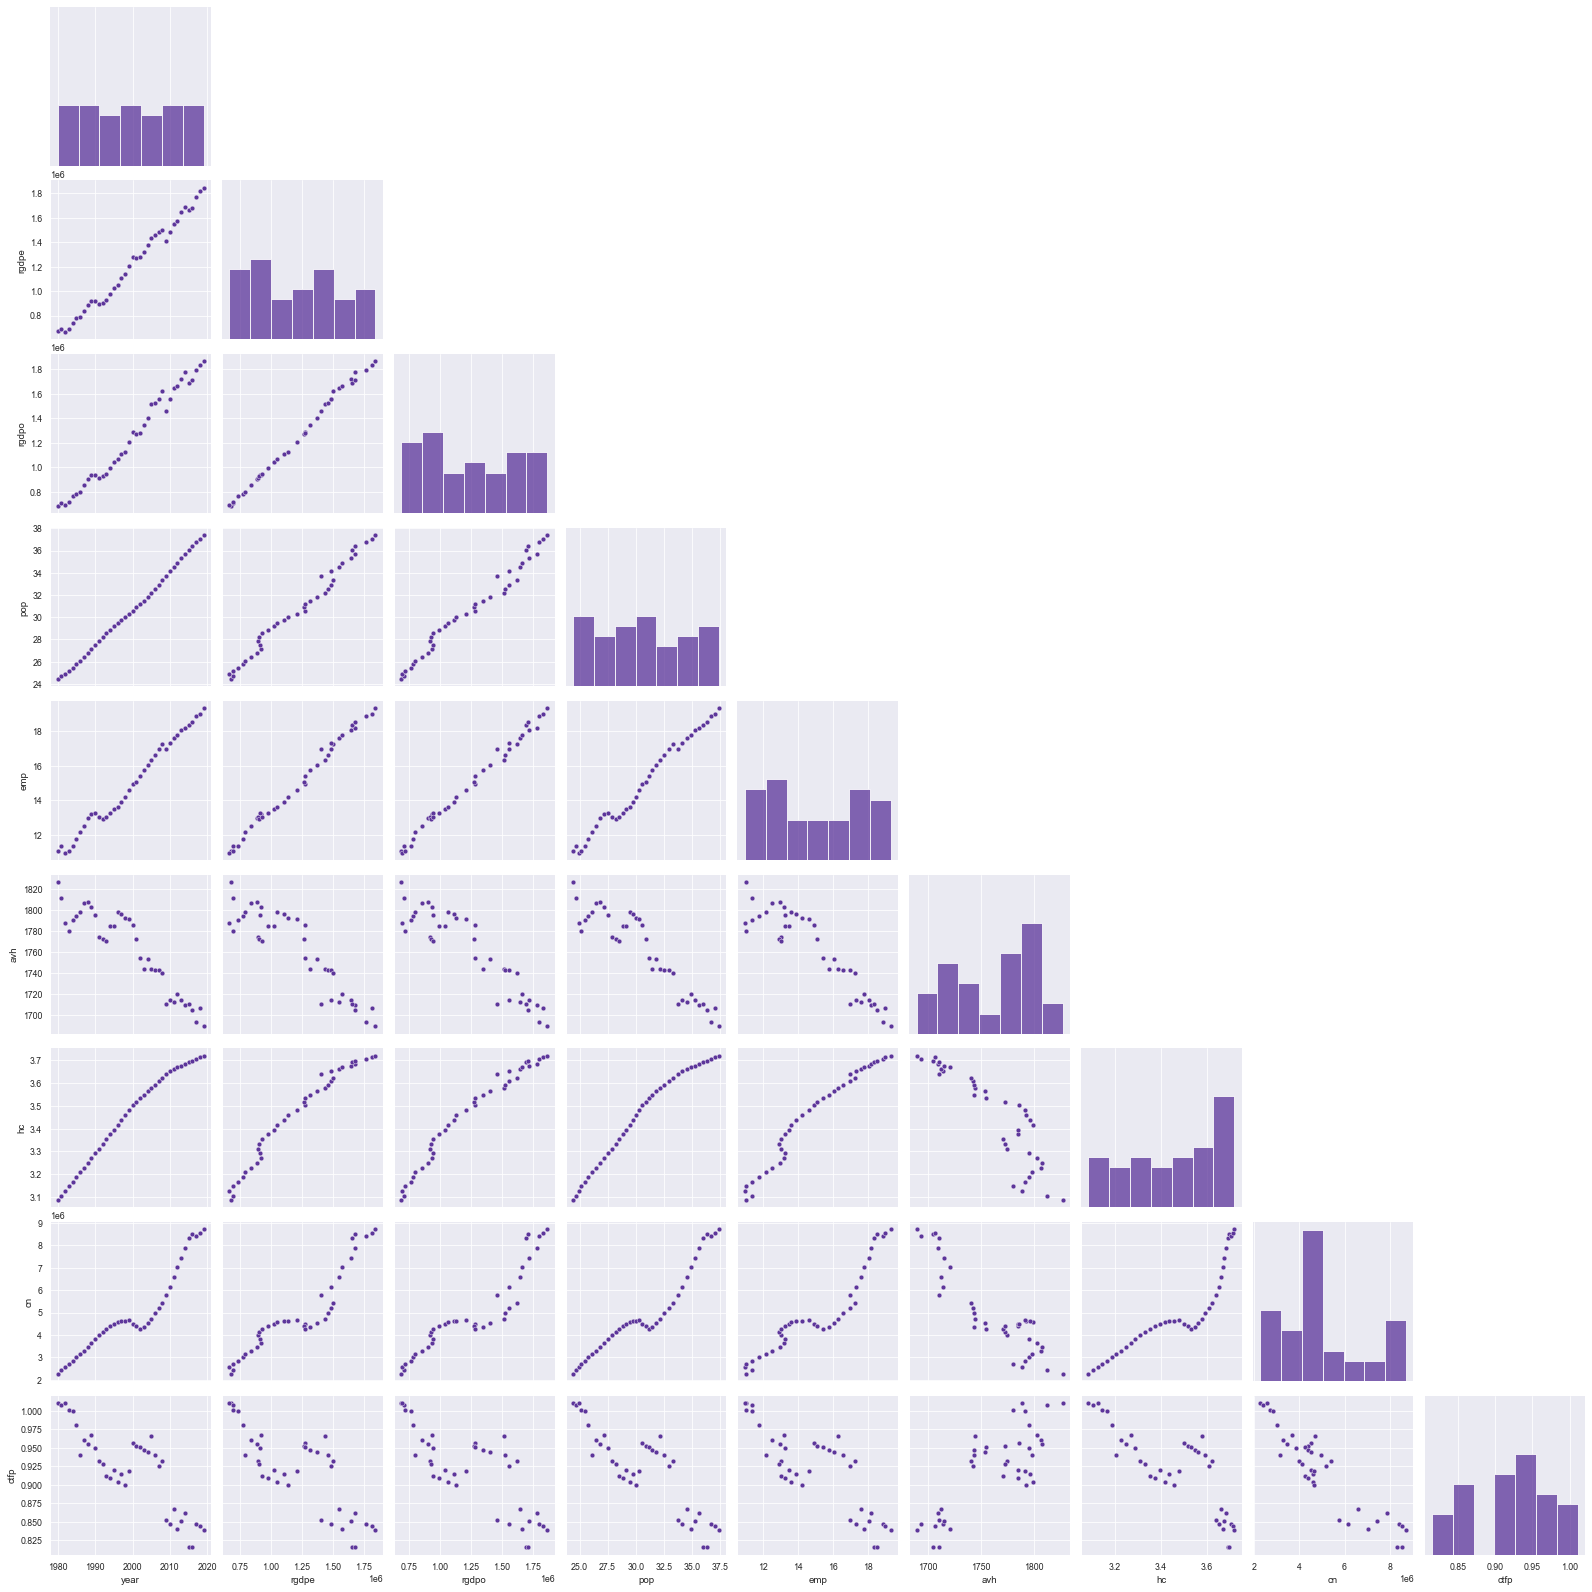

In [27]:
sns.pairplot(pwt_can, corner=True)

sns.pairplot allows us to take a quick look at scatter plots between all our variables (and histograms between same variable).

Actually, looking at the pairplot for just data on Canada, it seems like there is stronger correlations between variables here than if we look at all countries. Lets redo a correlation matrix but just for Canada


<AxesSubplot:title={'center':'Correlation Matrix - Canada'}>

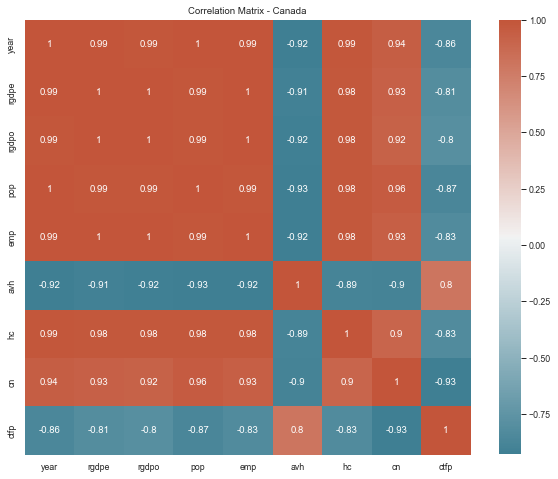

In [28]:
# calculate correlation matrix
fig, ax = plt.subplots(figsize=(10,8)) 
ax.set_title('Correlation Matrix - Canada')
corr = pwt_can.corr() 
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

Within a single country, it looks as though _many_ of these variables are **strongly** correlated to one another!

## Task 2: Data Analysis Pipeline

 🔜 Loading Data (partially done)

 🔜 Cleaning Data (partially done)

 ⏹️ Wrangle Data 🤠

I want to supplement my above data with a new data set that has data on the days of vacation/holidays guaranteed to workers in specific countries.

In [29]:
with open('../data/raw/days-of-vacation-and-holidays.csv') as f:
    print(f)
    lines = f.readlines()
    print(f'Delimiter: "{detect(lines[1])}"')


#Checking the file type, encoding on file, & delimiter

<_io.TextIOWrapper name='../data/raw/days-of-vacation-and-holidays.csv' mode='r' encoding='cp1252'>
Delimiter: ","


In [30]:
# Now we can properly import our data
vaca = pd.read_csv("../data/raw/days-of-vacation-and-holidays.csv",encoding='cp1251')

In [31]:
vaca.head() # It has a long column name, but apart from that it looks good!

,Entity,Code,Year,Days of vacation and holidays for full-time production workers in non-agricultural activities (Huberman & Minns 2007)
0,Australia,AUS,1870,8.0
1,Australia,AUS,1900,9.0
2,Australia,AUS,1938,22.0
3,Australia,AUS,1950,22.0
4,Australia,AUS,1980,32.0


In [32]:
vaca = vaca.rename(columns={"Code":"countrycode", "Days of vacation and holidays for full-time production workers in non-agricultural activities (Huberman & Minns 2007)":"Vacation Days", "Year":"year"})

In [33]:
list_vaca = vaca['countrycode'].unique().tolist()
vaca['countrycode'].unique().tolist()

['AUS',
 'BEL',
 'CAN',
 'DNK',
 'FRA',
 'DEU',
 'IRL',
 'ITA',
 'NLD',
 'ESP',
 'SWE',
 'CHE',
 'GBR',
 'USA']

These are the only countries we have data on for alloted vacation/holiday days, so lets join this with our larger data set on the country code

In [34]:
comb = pd.merge(pwt_s, vaca, how='left', on=["countrycode", "year"]).fillna(method='ffill')  #.drop(["Entity"], axis=1)#.fillna(method='ffill').dropna(subset=['Vacation Days']) 
comb = comb[comb["country"] == comb["Entity"]].drop(["Entity"], axis=1)

The above code block probably isn't as concise as it could be, but it does what it needs! It combines the two tables, extends the vacation days down to years that have NaN values after combining with pwt_s (because vacation day policy isn't updated yearly), drops countries where "Entity" and "Vacation Days" were extended by fillna into countries where it shouldn't have, then drops the Entity column.

Finally, to finish cleaning the data, we will drop **RGDPO** (Output-side real GDP), as it seems redundant to **RGDPE** (Expenditure-side real GDP)  for the scope of analysis I am capable of.

In [35]:
comb = comb.drop(["rgdpo"], axis=1)

 ✅ Loading Data

 ✅ Cleaning Data

 ✅ Wrangle Data 🤠

## Task 3 - Method Chaining

In [36]:
import project_functions2 as pf2
all_clean = pf2.load_and_process("../data/raw/pwt100.csv","../data/raw/days-of-vacation-and-holidays.csv")
all_clean

c:\Users\Administrator\Desktop\Textbooks\cosc301\project-group17\notebooks\project_functions2.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_clean = df_clean[df_clean["country"] == df_clean["Entity"]].drop(["Entity"], axis=1)[df_clean['year'] >= 1980]


,countrycode,country,currency_unit,year,rgdpe,pop,emp,avh,hc,cn,ctfp,vac,prod
590,AUS,Australia,Australian Dollar,1980,3.490858e+05,14.588405,6.277514,1909.762827,3.213360,1.535867e+06,0.845172,32.0,58.236464
591,AUS,Australia,Australian Dollar,1981,3.663431e+05,14.777243,6.356343,1894.809448,3.232605,1.602208e+06,0.856549,32.0,60.833830
592,AUS,Australia,Australian Dollar,1982,3.576240e+05,14.979205,6.340231,1870.658317,3.251965,1.648038e+06,0.845694,32.0,60.305516
593,AUS,Australia,Australian Dollar,1983,3.779333e+05,15.194641,6.241294,1857.014130,3.271441,1.689567e+06,0.871549,32.0,65.216170
594,AUS,Australia,Australian Dollar,1984,3.920949e+05,15.423166,6.458382,1878.158461,3.291033,1.742347e+06,0.839384,32.0,64.649503
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12175,USA,United States,US Dollar,2015,1.890512e+07,320.878310,150.248474,1770.023174,3.728116,6.505779e+07,1.000000,20.0,142.174090
12176,USA,United States,US Dollar,2016,1.928525e+07,323.015995,152.396957,1766.744125,3.733411,6.597404e+07,1.000000,20.0,143.253540
12177,USA,United States,US Dollar,2017,1.975475e+07,325.084756,154.672317,1763.726676,3.738714,6.694270e+07,1.000000,20.0,144.829738
12178,USA,United States,US Dollar,2018,2.036944e+07,327.096265,156.675903,1774.703811,3.744024,6.800738e+07,1.000000,20.0,146.514631


Scrub-a-dub! 🧼🛁 Imported in from my .py file and returns the cleaned data.

### Group Analysis - Nasser

**Figure 2 - Year and Productivity**

Text(0, 0.5, 'Productivity - rGDP per Hour Worked ')

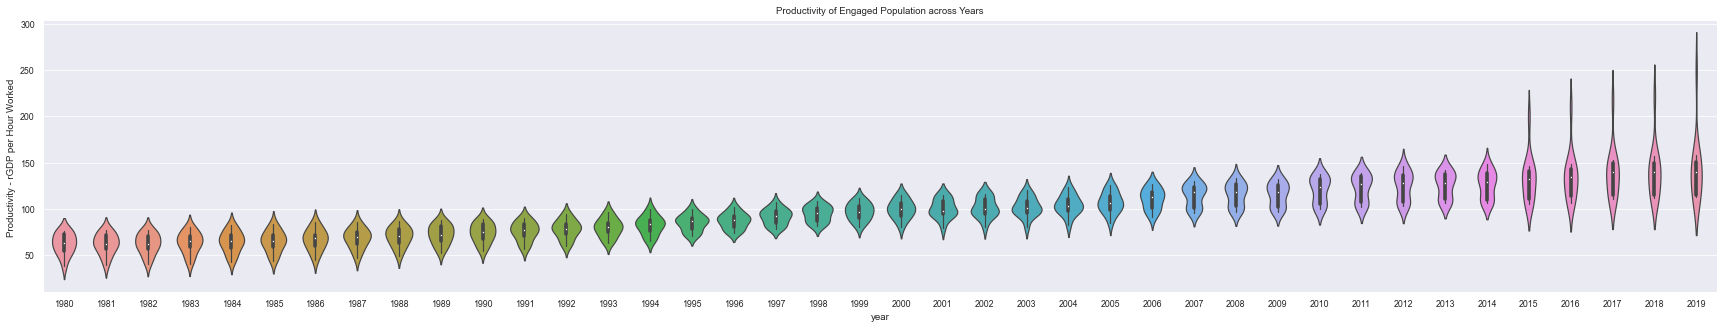

In [37]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.violinplot(data=all_clean, x="year", y="prod")
ax.set_title('Productivity of Engaged Population across Years')
ax.set_ylabel('Productivity - rGDP per Hour Worked ')

This figure shows us that from 1950 to 2019, productivity has steadily rose together in all of the selected countries and appears, on average, to have hit a plateau in the 2010s but with significant outliers appearing from 2015 onwards . 

**Figure 3 - Average Annual Hours Worked per Year and Productivity**

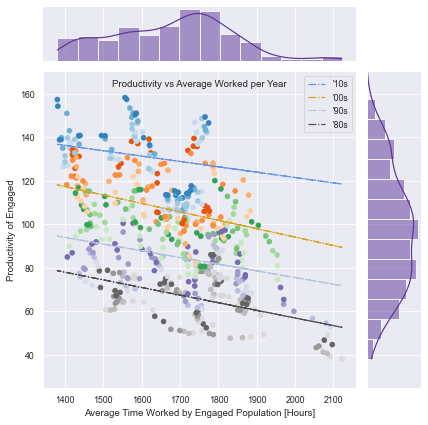

In [38]:
sns.set_palette("twilight_shifted")
sns.set_style("darkgrid")
sns.set_context("paper")
ax1=sns.jointplot(x = all_clean['avh'], y = all_clean['prod'], kind = 'reg',truncate=False)
ax1.ax_joint.cla()

X = all_clean['avh'].to_numpy()
Y = all_clean['prod'].to_numpy()
z = all_clean['year'].to_numpy()

ind1 = np.where((z >= 1980)&(z<1990))
ind2 = np.where((z >= 1990)&(z<2000))
ind3 = np.where((z >= 2000)&(z<2010))
ind4 = np.where((z >= 2010)&(z<2020))
coef1 = np.polyfit(X[ind1], Y[ind1], 1)
p1 = np.poly1d(coef1)
coef2 = np.polyfit(X[ind2], Y[ind2], 1)
p2 = np.poly1d(coef2)
coef3 = np.polyfit(X[ind3], Y[ind3], 1)
p3 = np.poly1d(coef3)
coef4 = np.polyfit(X[ind4], Y[ind4], 1)
p4 = np.poly1d(coef4)

plt.xlabel("Average Time Worked by Engaged Population [Hours]")
plt.ylabel("Productivity of Engaged")
plt.scatter(x = X, y = Y, c=z, cmap='tab20c_r')
plt.plot(X, p4(X), c='cornflowerblue', linestyle='-.', label="'10s")
plt.plot(X, p3(X), 'goldenrod', linestyle='-.', label="'00s")
plt.plot(X, p2(X), 'lightsteelblue', linestyle='-.', label="'90s")
plt.plot(X, p1(X), '0.3', linestyle='-.', label="'80s")



plt.ylim(25, 170)
plt.title('Productivity vs Average Worked per Year',y=1.0, pad=-14)
plt.legend()

Plotted above on the y-axis is a measure of Productivity that we have calculated. It is based on the Expenditure-side real GDP produced per Hour Worked by those engaged in a population _(an"engaged" member of a population is anyone employed)_. The x-axis is data on the average time worked by said engaged population. We observe two trends here. For one, less average time worked seems to be positively correlated with the productivity produced. One must be careful to conflate correlation with causation, but this bodes well to the idea of overworking leading to a drop off in the effectiveness of employees! The other trend is that we see a clear increase in productivity over time. The most productive average employee in the 1980's is nearly 60% as productive as the least average employee in the 2010s! We will follow up below as to factors that could have changed over the decades to make employees more effective at their work. 

_method of plotting a matplotlib.pyplot scatterplot overtop of the seaborn jointplot adapted from here: https://stackoverflow.com/questions/53964485/seaborn-jointplot-color-by-density_

**Figure 4 - Human Capital Index and Productivity**

Text(0.5, 1.0, 'Country-by-Country -- Productivity vs Human Capital Index')

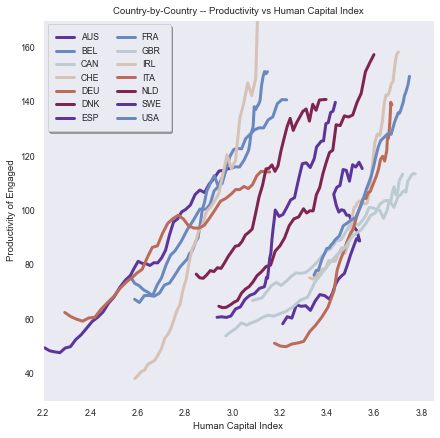

In [39]:
lis = all_clean['countrycode'].unique().tolist()
fig, ax = plt.subplots(figsize=(7,7))
for i in np.arange(0,len(lis)):
    all_clean_i = all_clean[all_clean['countrycode'] == lis[i]]


    ax.plot(all_clean_i["hc"], all_clean_i["prod"], label=lis[i], linewidth=3)
ax.set_ylim(30,170)
ax.set_xlim(2.2)
ax.set_xlabel('Human Capital Index')
ax.set_ylabel("Productivity of Engaged") #
ax.grid()
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1,ncol=2)
ax.set_title("Country-by-Country -- Productivity vs Human Capital Index")

This figure shows that as productivity has increased, human capital index has followed a similar positive trend across all countries. The human capital index (HCI) is a world bank statistic released annually that measures how much economic capital is loss through lack of education and health. Therefore, this means that the higher a country scores on the HCI, the higher the quality of the education and healthcare systems that are in place to support the workers in the state. With the benefit of hindsight, this is expected in the countries selected as these states are all considered to be 'first world countries' and it makes logical sense that the more educated and healthy the working population is, the more efficient and effective their input into the economy will be. 

Information about the human capital index obtained from here: https://www.worldbank.org/en/publication/human-capital